在现实生活中，纯粹的线性模型是很难遇到的，我们不妨再来看看下面的数据集：

| x | y |
|---|---|
|40 |216|
|50 |399|
|60 |496|
|70 |507|
|80 |432|
|90 |271|

如果我们按照线性回归的解法，也能得到解，如下所示：

In [25]:
import numpy as np

X = np.matrix([
    [1, 1, 1, 1, 1, 1], 
    [40, 50, 60, 70, 80, 90]]).T
Y = np.matrix([216, 399, 496, 507, 432, 271]).T

a = (X.T * X).I * X.T * Y
print("a = {0}".format(a))

a = [[315.33333333]
 [  1.1       ]]


得到一元线性回归：

$$
y = 1.1x + 315.33
$$

我们画出回归线和散点数据：

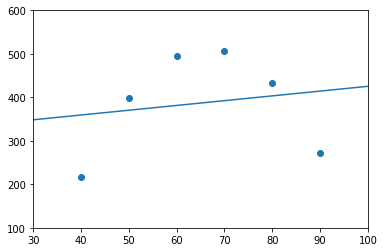

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(30, 100)
plt.ylim(100, 600)

X = np.array([40, 50, 60, 70, 80, 90])
Y = np.array([216, 399, 496, 507, 432, 271])
plt.scatter(X, Y)

x = np.linspace(30, 100)
y = 1.1*x+315.33
plt.plot(x, y)

plt.show()

从图中很容易看出，线性回归对数据的拟合度不是很高，很显然散点的分布不是直线，而是一个二次曲线。我们知道二次曲线通常可以写成这样：

$$
y = a_0 + a_1x + a_2x^2
$$

到现在为止，我们一直在处理线性回归问题，那么对于这种不是线性的情况，该如何求解呢？首先，看到上面这个式子，我们不由得联想到了我们之前遇到的二元线性回归：

$$
y = a_0 + a_1x_1 + a_2x_2
$$

二元线性回归问题处理的是两个自变量，但是我们这里只有一个自变量，怎么办呢？答案是：自己造一个出来。

| x |$x^2$| y |
|---|-----|---|
|40 |1600 |216|
|50 |2500 |399|
|60 |3600 |496|
|70 |4900 |507|
|80 |6400 |432|
|90 |8100 |271|

我们引入一个新变量 $x^2$，令：$x_1 = x, x_2 = x^2$，这样我们就可以像处理线性回归问题一样处理非线性回归问题了。

In [30]:
import numpy as np

X = np.matrix([
    [1, 1, 1, 1, 1, 1], 
    [40, 50, 60, 70, 80, 90],
    [1600, 2500, 3600, 4900, 6400, 8100]]).T
Y = np.matrix([216, 399, 496, 507, 432, 271]).T

a = (X.T * X).I * X.T * Y
print("a = {0}".format(a))

a = [[-1376.  ]
 [   57.  ]
 [   -0.43]]


得到回归问题的解：

$$
\begin{align}
y &= 57x_1 - 0.43x_2 - 1376 \\
&= 57x - 0.43x^2 - 1376
\end{align}
$$

画出二次曲线图，拟合度非常高：

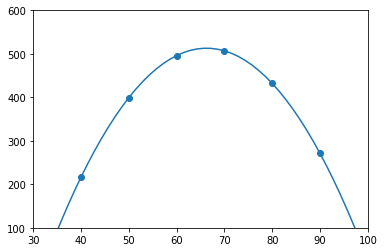

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(30, 100)
plt.ylim(100, 600)

X = np.array([40, 50, 60, 70, 80, 90])
Y = np.array([216, 399, 496, 507, 432, 271])
plt.scatter(X, Y)

x = np.linspace(30, 100)
y = 57*x - 0.43*x*x - 1376
plt.plot(x, y)

plt.show()

一元二次回归的求解可以转换为二元线性回归的求解。依葫芦画瓢，当我们遇到一元三次，一元四次，或 一元 N 次曲线时，也可以将自变量 $x$ 扩充为 $x^3$，$x^4$ 或 $x^N$，从而转换为 N 元线性回归的求解。如果自变量不止一个，譬如二元三次曲线，也可以使用同样的方法，只不过要注意自变量之间的组合。